In [71]:
import json
import pandas as pd

# Path to your JSON file
file_path = 'videos_metadata_with_transcripts.json'

# Open the JSON file and load its content
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)



df


,video_id,title,description,category_id,duration_minutes,video_url,category,transcript
0,aDRARW93DbY,"What do you mean ""Explorer Scouts ARE NOT ALLO...","As the kids prepare to leave for summer camp, ...",1,4.083333,https://www.youtube.com/watch?v=aDRARW93DbY,Film & Animation,[Music] ouch official beagle Scout manual huh ...
1,sEL4ICu30zs,skibidi toilet zombie universe 49,📌Follow our Social Media:\nSecond channel: @Mo...,1,3.566667,https://www.youtube.com/watch?v=sEL4ICu30zs,Film & Animation,"I racked my brain, wondering who helped us get..."
2,-IoTbcqgYKw,"Sahra’nın, Orhun amcasından özel isteği 🥹 | Es...",Join this channel to get access to perks:\nhtt...,1,3.216667,https://www.youtube.com/watch?v=-IoTbcqgYKw,Film & Animation,"You're going to be okay, right? Of course, my ..."
3,F5ef8DoV4a0,Godzilla vs. Submarines | GODZILLA | Matthew B...,French nuclear tests irradiate an iguana into ...,1,9.500000,https://www.youtube.com/watch?v=F5ef8DoV4a0,Film & Animation,careful D give me your hand I got you got [Mus...
4,0ZgwrIlBf2U,🎥 BIRD BOX (2018) | Full Movie Trailer | Full ...,A woman and a pair of children are blindfolded...,1,3.100000,https://www.youtube.com/watch?v=0ZgwrIlBf2U,Film & Animation,[Music] [Music] please don't take my have you ...
...,...,...,...,...,...,...,...,...
8604,QbpXozZhYIo,Christina Aguilera's Audition Leaves Cher Spee...,A small-town girl ventures to Los Angeles and ...,1,4.600000,https://www.youtube.com/watch?v=QbpXozZhYIo,Film & Animation,[Music] excellent that was great thank you ver...
8605,iMf5iCFz5wY,Aqours「永久hours」Promotion Video,Aqours「永久hours」Promotion Video\n\n永久hours\n作詞：...,1,5.500000,https://www.youtube.com/watch?v=iMf5iCFz5wY,Film & Animation,None
8606,3plVh39Rcg0,skibidi toilet multiverse 044,Wasn't this too easy???\n( Check this merch ou...,1,8.733333,https://www.youtube.com/watch?v=3plVh39Rcg0,Film & Animation,[Music] all [Music] for Ste [Music] w [Music] ...
8607,RswkyHO6zkM,skibidi toilet zombie universe 50 : Delete Man,📌Follow our Social Media:\nSecond channel: @Mo...,1,3.366667,https://www.youtube.com/watch?v=RswkyHO6zkM,Film & Animation,"You deceived me! I wanted to help you, but yo..."


In [14]:
df['transcript'].isnull().sum()
print(df.shape)
print(df['transcript'][9])


(8609, 8)
None


In [54]:
print(df.duplicated().value_counts())
df =df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df = df.drop_duplicates(subset='video_id')



False    4121
dtype: int64


In [55]:
df['video_id'].isna().sum()

1

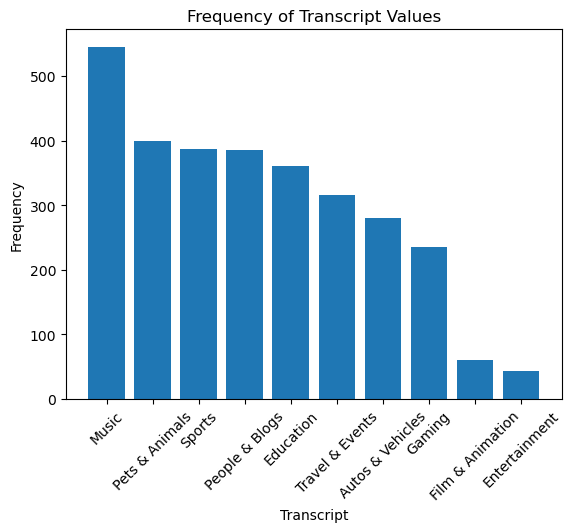

In [56]:
import matplotlib.pyplot as plt
# Count the occurrences of each unique value
transcript_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(transcript_counts.index, transcript_counts.values)
plt.xlabel('Transcript')
plt.ylabel('Frequency')
plt.title('Frequency of Transcript Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [57]:
df.shape
# print(df.duplicated().value_counts())

(3011, 8)

In [58]:
# (df['transcript'].fillna(df['transcript'])).shape
df['transcript'] = df['transcript'].fillna(df['description']+df['title'])
df['transcript'].isna().sum()

0

In [40]:

df[df['category']=='Gaming']

,video_id,title,description,category_id,duration_minutes,video_url,category,transcript
2122,h6moAUIIzTA,Easily 3 Star Last Town Hall 16 Challenge (Cla...,How to 3 Star the Last Town Hall 16 Challenge ...,20,4.083333,https://www.youtube.com/watch?v=h6moAUIIzTA,Gaming,easily three star the last Town Hall 16 challe...
2123,DN33tT7HiDQ,Beta Chef vs Alpha Chef vs Sigma Chef,It is very clear from their personalities on M...,20,3.233333,https://www.youtube.com/watch?v=DN33tT7HiDQ,Gaming,It is very clear from their personalities on M...
2124,eZNxfCOFpV4,God of War ENTIRE Story in 3 minutes! (God of ...,This is the entire story of God of War series ...,20,3.466667,https://www.youtube.com/watch?v=eZNxfCOFpV4,Gaming,This is the God of War canon video game series...
2125,rKjUAWlbTJk,Assassin’s Creed Valhalla: Cinematic World Pre...,Watch the world premiere of Assassin’s Creed V...,20,4.016667,https://www.youtube.com/watch?v=rKjUAWlbTJk,Gaming,Watch the world premiere of Assassin’s Creed V...
2126,SpMyXjH8r5c,Mech Arena | Mech Spotlight | Cheetah,"➕🚀With huge damage potential and high max HP, ...",20,3.000000,https://www.youtube.com/watch?v=SpMyXjH8r5c,Gaming,"➕🚀With huge damage potential and high max HP, ..."
...,...,...,...,...,...,...,...,...
7799,53drwDNxlDo,I Opened THE DEPTHS in Fisch!,opening the gates of depths\n\nThank you for w...,20,12.300000,https://www.youtube.com/watch?v=53drwDNxlDo,Gaming,opening the gates of depths\n\nThank you for w...
7806,NaN,How To Get The Best Control Setting in PUBG MO...,Do you want to make the best control setting i...,20,9.550000,https://www.youtube.com/watch?v=YCCgUp4VXjs,Gaming,Do you want to make the best control setting i...
7849,NaN,Hay Day Kitchen: Chocolate Roll!,The most wonderful time of the year is here! T...,20,3.650000,https://www.youtube.com/watch?v=vELrpvj3WkE,Gaming,The most wonderful time of the year is here! T...
7873,NaN,Top 10 Best Offline FPS Games for Android & iO...,Guys Pre-Register Noah's Heart now\nAndroid/iO...,20,11.316667,https://www.youtube.com/watch?v=fsuIgY70FQ8,Gaming,Guys Pre-Register Noah's Heart now\nAndroid/iO...


In [59]:
data = df[['video_id', 'title', 'description', 'category_id', 'duration_minutes', 'category', 'transcript']]


In [60]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the Lemmatizer
lem = WordNetLemmatizer()

def clean_text(text):
    # Remove content in square brackets (e.g., [Music])
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Remove non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization (considering verb form as in your example)
    words = [lem.lemmatize(word, "v") for word in words]
    
    # Join the cleaned tokens back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the text cleaning function to the dataset columns
data['title'] = data['title'].apply(clean_text)
data['description'] = data['description'].apply(clean_text)
data['transcript'] = data['transcript'].apply(clean_text)


C:\Users\Bhupesh\AppData\Local\Temp\ipykernel_18232\1737623888.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(clean_text)
C:\Users\Bhupesh\AppData\Local\Temp\ipykernel_18232\1737623888.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].apply(clean_text)
C:\Users\Bhupesh\AppData\Local\Temp\ipykernel_18232\1737623888.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [21]:
data

,video_id,title,description,category_id,duration_minutes,category,transcript
0,aDRARW93DbY,mean explorer scout allow camp snoopy cartoon kid,kid prepare leave summer camp snoopy discover ...,1,4.083333,Film & Animation,ouch official beagle scout manual huh sort gui...
1,sEL4ICu30zs,skibidi toilet zombie universe,social media second channel monsteruplive disc...,1,3.566667,Film & Animation,rack brain wonder help us get know sure know w...
2,-IoTbcqgYKw,sahra nın orhun amcasından özel isteği esaret ...,join channel get access perk redemption air ka...,1,3.216667,Film & Animation,youre go okay right course dear dont worry hea...
3,F5ef8DoV4a0,godzilla vs submarine godzilla matthew broderi...,french nuclear test irradiate iguana giant mon...,1,9.500000,Film & Animation,careful give hand get get hear animal come gue...
4,0ZgwrIlBf2U,bird box full movie trailer full hd p,woman pair children blindfold make way dystopi...,1,3.100000,Film & Animation,please dont take feel sleep better oh ruff nev...
...,...,...,...,...,...,...,...
8599,uv8mbL-MC58,make story scratch tutorial,want create story tutorial show make story pro...,27,9.133333,Education,want create story tutorial show make story pro...
8600,ii3VoB0pl_M,top spinal decompression techniques sciatica d...,effective passive decompression technique give...,27,5.383333,Education,effective passive decompression technique give...
8603,EUnAh_0Gbmo,outsmart best smith hilarious men black audition,work secret dress black best last line defense...,1,10.050000,Film & Animation,help yeah dude give card elevator youre late s...
8605,iMf5iCFz5wY,video,video 永久hours 亜貴 okajima hayato yamamoto yamam...,1,5.500000,Film & Animation,video 永久hours 亜貴 okajima hayato yamamoto yamam...


In [61]:
# !pip install nltk

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download stop words from nltk
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

# Combine stop words from nltk and sklear
# n
stop_words = nltk_stopwords.union(ENGLISH_STOP_WORDS)

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to text fields
data['cleaned_title'] = data['title'].apply(remove_stop_words)
data['cleaned_description'] = data['description'].apply(remove_stop_words)
data['cleaned_transcript'] = data['transcript'].apply(remove_stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhupesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
def create_weighted_feature(row):
    title_weight = 0.8
    description_weight = 0.6
    transcript_weight = 0.4

    # Weighted concatenation of text features
    combined_text = (
        " ".join([row['cleaned_title']] * int(title_weight * 10)) + " " +
        " ".join([row['cleaned_description']] * int(description_weight * 10)) + " " +
        " ".join([row['cleaned_transcript']] * int(transcript_weight * 10))
    )
    return combined_text

# Apply the function
data['weighted_text'] = data.apply(create_weighted_feature, axis=1)


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the weighted text (or combine title, description, and transcript if needed)
tfidf_matrix = vectorizer.fit_transform(data['weighted_text'])

# You can now calculate cosine similarity between videos
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Now you have a cosine similarity matrix, where each entry represents the similarity score between two videos.





In [92]:
tfidf_matrix[609].shape

(1, 62107)

In [64]:
def get_video_index_by_id(video_id, data=data):
    """Helper function to get the index of a video based on video ID"""
    if video_id in data['video_id'].values:
        return data[data['video_id'] == video_id].index[0]
    else:
        return None  # Return None if the video is not found

def get_recommendations(video_id, cosine_sim=cosine_sim, data=data):
    # Get the index of the video based on the video ID
    video_idx = get_video_index_by_id(video_id, data)
    
    if video_idx is None:
        return "Video ID not found in the database."
    
    # Get pairwise similarity scores for the video
    sim_scores = list(enumerate(cosine_sim[video_idx]))
    
    # Sort the videos based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 5 most similar videos (excluding the video itself)
    top_similar_indices = [i[0] for i in sim_scores[1:6]]
    
    # Retrieve video IDs for the top similar videos
    recommended_video_ids = data.iloc[top_similar_indices]['video_id'].tolist()
    
    return recommended_video_ids




In [70]:
recommended_video_ids = get_recommendations('F5ef8DoV4a0')  # Get recommended video IDs
recommended_video_urls = df[df['video_id'].isin(recommended_video_ids)][ ['video_id','title','description','category' ,'video_url']]

recommend=df[df['video_id']=='F5ef8DoV4a0'][ 'title']
print(f"Title video details : {recommend}")
(recommended_video_urls)


Title video details : 3    Godzilla vs. Submarines | GODZILLA | Matthew B...
Name: title, dtype: object


,video_id,title,description,category,video_url
6,ei0ASD7mgX8,Blowing Up Madison Square Garden | GODZILLA | ...,French nuclear tests irradiate an iguana into ...,Film & Animation,https://www.youtube.com/watch?v=ei0ASD7mgX8
22,QbpXozZhYIo,Christina Aguilera's Audition Leaves Cher Spee...,A small-town girl ventures to Los Angeles and ...,Film & Animation,https://www.youtube.com/watch?v=QbpXozZhYIo
30,vAE1K7Q1_GI,Christina Aguilera's BURLESQUE Performance Bri...,A small-town girl ventures to Los Angeles and ...,Film & Animation,https://www.youtube.com/watch?v=vAE1K7Q1_GI
656,Wa9Cz1aOh4U,10 Minutes of Robert McCall Brutally Beating u...,A man who believes he has put his mysterious p...,Film & Animation,https://www.youtube.com/watch?v=Wa9Cz1aOh4U
8603,EUnAh_0Gbmo,How to Outsmart the Best | Will Smith’s Hilari...,They work in secret and dress in black. And th...,Film & Animation,https://www.youtube.com/watch?v=EUnAh_0Gbmo


In [89]:
df[df['video_id']=='F5ef8DoV4a0']['video_url']

3    https://www.youtube.com/watch?v=F5ef8DoV4a0
Name: video_url, dtype: object

,video_id,title,description,category_id,duration_minutes,category,transcript,cleaned_title,cleaned_description,cleaned_transcript,weighted_text
0,aDRARW93DbY,mean explorer scout allow camp snoopy cartoon kid,kid prepare leave summer camp snoopy discover ...,1,4.083333,Film & Animation,ouch official beagle scout manual huh sort gui...,mean explorer scout allow camp snoopy cartoon kid,kid prepare leave summer camp snoopy discover ...,ouch official beagle scout manual huh sort gui...,mean explorer scout allow camp snoopy cartoon ...
1,sEL4ICu30zs,skibidi toilet zombie universe,social media second channel monsteruplive disc...,1,3.566667,Film & Animation,rack brain wonder help us get know sure know w...,skibidi toilet zombie universe,social media second channel monsteruplive disc...,rack brain wonder help know sure know wasteful...,skibidi toilet zombie universe skibidi toilet ...
2,-IoTbcqgYKw,sahra nın orhun amcasından özel isteği esaret ...,join channel get access perk redemption air ka...,1,3.216667,Film & Animation,youre go okay right course dear dont worry hea...,sahra nın orhun amcasından özel isteği esaret ...,join channel access perk redemption air kanal ...,youre okay right course dear dont worry hear o...,sahra nın orhun amcasından özel isteği esaret ...
3,F5ef8DoV4a0,godzilla vs submarine godzilla matthew broderi...,french nuclear test irradiate iguana giant mon...,1,9.500000,Film & Animation,careful give hand get get hear animal come gue...,godzilla vs submarine godzilla matthew broderi...,french nuclear test irradiate iguana giant mon...,careful hand hear animal come guess way sir sp...,godzilla vs submarine godzilla matthew broderi...
4,0ZgwrIlBf2U,bird box full movie trailer full hd p,woman pair children blindfold make way dystopi...,1,3.100000,Film & Animation,please dont take feel sleep better oh ruff nev...,bird box movie trailer hd p,woman pair children blindfold make way dystopi...,dont feel sleep better oh ruff say hoe conditi...,bird box movie trailer hd p bird box movie tra...
...,...,...,...,...,...,...,...,...,...,...,...
8596,u0y2Wvc0Jm0,fertilizationmedical animation sperm,fertilization fertilization occur sperm must e...,27,5.000000,Education,fertilization fertilization occur sperm must e...,fertilizationmedical animation sperm,fertilization fertilization occur sperm enter ...,fertilization fertilization occur sperm enter ...,fertilizationmedical animation sperm fertiliza...
8597,G1GAlC7lPcI,ways take care hair make thin thick hairs hair...,thin thick hair transformation naturally try e...,27,9.350000,Education,thin thick hair transformation naturally try e...,ways care hair make hairs hair growth tip,hair transformation naturally try excellent re...,hair transformation naturally try excellent re...,ways care hair make hairs hair growth tip ways...
8598,FaBmP1Bo9l8,bake cake microwave convection oven preheat co...,excite share st episode series make cake micro...,27,4.350000,Education,excite share st episode series make cake micro...,bake cake microwave convection oven preheat co...,excite share st episode series make cake micro...,excite share st episode series make cake micro...,bake cake microwave convection oven preheat co...
8599,uv8mbL-MC58,make story scratch tutorial,want create story tutorial show make story pro...,27,9.133333,Education,want create story tutorial show make story pro...,make story scratch tutorial,want create story tutorial make story project ...,want create story tutorial make story project ...,make story scratch tutorial make story scratch...
